In [40]:
# !pip install xgboost 
# !pip install catboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 258.3 kB/s eta 0:06:35
   ---------------------------------------- 0.5/102.4 MB 258.

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 319086796084fee5e4254300dc81aad1ae0b201cb576a9e87e6c7d030483be7e
             Got        0cc6edbdb09cc86451f7d960327814cf8a0da94f40640c50d28549be17bf9bed



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve, 
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline 

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


In [9]:
# df2010 = pd.read_stata("BRFSS2010.dta")
# df2011 = pd.read_stata("BRFSS2011.dta")
# df2012 = pd.read_stata("BRFSS2012.dta")
# df2013 = pd.read_stata("BRFSS2013.dta")
# df2014 = pd.read_stata("BRFSS2014.dta")
# df2015 = pd.read_stata("BRFSS2015.dta")
# df2016 = pd.read_stata("BRFSS2016.dta")
# df2017 = pd.read_stata("BRFSS2017.dta")

df2018 = pd.read_stata("BRFSS2018.dta")
df2019 = pd.read_stata("BRFSS2019.dta")
df2020 = pd.read_stata("BRFSS2020.dta")
df2021 = pd.read_stata("BRFSS2021.dta")
df2022 = pd.read_stata("BRFSS2022.dta")
df2023 = pd.read_stata("BRFSS2023.dta")


C:\Users\Armin KHoojavi\AppData\Local\Temp\ipykernel_3168\2150436268.py:14: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df2022 = pd.read_stata("BRFSS2022.dta")
C:\Users\Armin KHoojavi\AppData\Local\Temp\ipykernel_3168\2150436268.py:15: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df2023 = pd.read_stata("BRFSS2023.dta")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [2]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3", 
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


In [11]:
df2018 = df2018.rename(columns={"hlthcvr1":"hlthpln1"})

df2019 = df2019.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "hlthcvr1":"hlthpln1", "chccopd2":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3"})

df2020 = df2020.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "hlthcvr1":"hlthpln1", "chccopd2":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3"})

df2021 = df2021.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "priminsr":"hlthpln1", "chccopd3":"chccopd1", "havarth5":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "x_incomg1":"x_incomg", "persdoc3":"persdoc2"})

df2022 = df2022.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "priminsr":"hlthpln1", "chccopd3":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "alcday4":"alcday5", "x_mrace2":"x_prace1", "x_racegr4":"x_racegr3", "x_incomg1":"x_incomg", 
                                "persdoc3":"persdoc2"})

df2023 = df2023.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "primins1":"hlthpln1", "chccopd3":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "alcday4":"alcday5", "x_mrace1":"x_prace1", "x_incomg1":"x_incomg", "persdoc3":"persdoc2"})


In [ ]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9], 
    'stopsmk2': [7, 9, 77, 99], 
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99], 
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df2018.columns]
for col in cols_in_df:
    df2018[col] = df2018[col].replace(replacement_dict[col], np.nan)
    df2019[col] = df2019[col].replace(replacement_dict[col], np.nan)
    df2020[col] = df2020[col].replace(replacement_dict[col], np.nan)
    df2021[col] = df2021[col].replace(replacement_dict[col], np.nan)
    df2022[col] = df2022[col].replace(replacement_dict[col], np.nan)
    df2023[col] = df2023[col].replace(replacement_dict[col], np.nan)


In [13]:
# result = pd.DataFrame(columns=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
result = pd.DataFrame(columns=[2018, 2019, 2020, 2021, 2022, 2023])

# percent of missing values
for _col in cols:
    result.loc[_col] = result.shape[1] * [np.nan]


In [14]:
for i in df2018.columns:
    for find in cols:
        if i == find:
            result.loc[find][2018] = (df2018.isnull().sum()[find]) / df2018.shape[0]

for i in df2019.columns:
    for find in cols:
        if i == find:
            # print(f"{find} is in 2019")
            result.loc[find][2019] = (df2019.isnull().sum()[find]) / df2019.shape[0]

for i in df2020.columns:
    for find in cols:
        if i == find:
            # print(f"{find} is in 2020")
            result.loc[find][2020] = (df2020.isnull().sum()[find]) / df2020.shape[0]

for i in df2021.columns:
    for find in cols:
        if i == find:
            # print(f"{find} is in 2021")
            result.loc[find][2021] = (df2021.isnull().sum()[find]) / df2021.shape[0]

for i in df2022.columns:
    for find in cols:
        if i == find:
            # print(f"{find} is in 2022")
            result.loc[find][2022] = (df2022.isnull().sum()[find]) / df2022.shape[0]

for i in df2023.columns:
    for find in cols:
        if i == find:
            # print(f"{find} is in 2023")
            result.loc[find][2023] = (df2023.isnull().sum()[find]) / df2023.shape[0]


C:\Users\Armin KHoojavi\AppData\Local\Temp\ipykernel_3168\3271892870.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result.loc[find][2018] = (df2018.isnull().sum()[find]) / df2018.shape[0]
C:\Users\Armin KHoojavi\AppData\Local\Temp\ipyk

In [ ]:
# result.to_csv("result.csv", sep=',')
result


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [ ]:
res = result.copy()
res = res.dropna(axis=0)
# res.to_csv("res.csv", sep=',')
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


# codes

In [3]:
df2018 = pd.read_stata("BRFSS2018.dta")

df2018 = df2018.rename(columns={"hlthcvr1":"hlthpln1"})

res = pd.read_csv("C:\\Users\\Armin KHoojavi\\Downloads\\6th Semster\\projects\\Data maning\\res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [4]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9], 
    'stopsmk2': [7, 9, 77, 99], 
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99], 
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df2018.columns]
for col in cols_in_df:
    df2018[col] = df2018[col].replace(replacement_dict[col], np.nan)


In [5]:
print(df2018.shape)
df2018.dropna(subset=["x_smoker3"],inplace=True)
df2018.shape


(437436, 275)


(420620, 275)

In [23]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

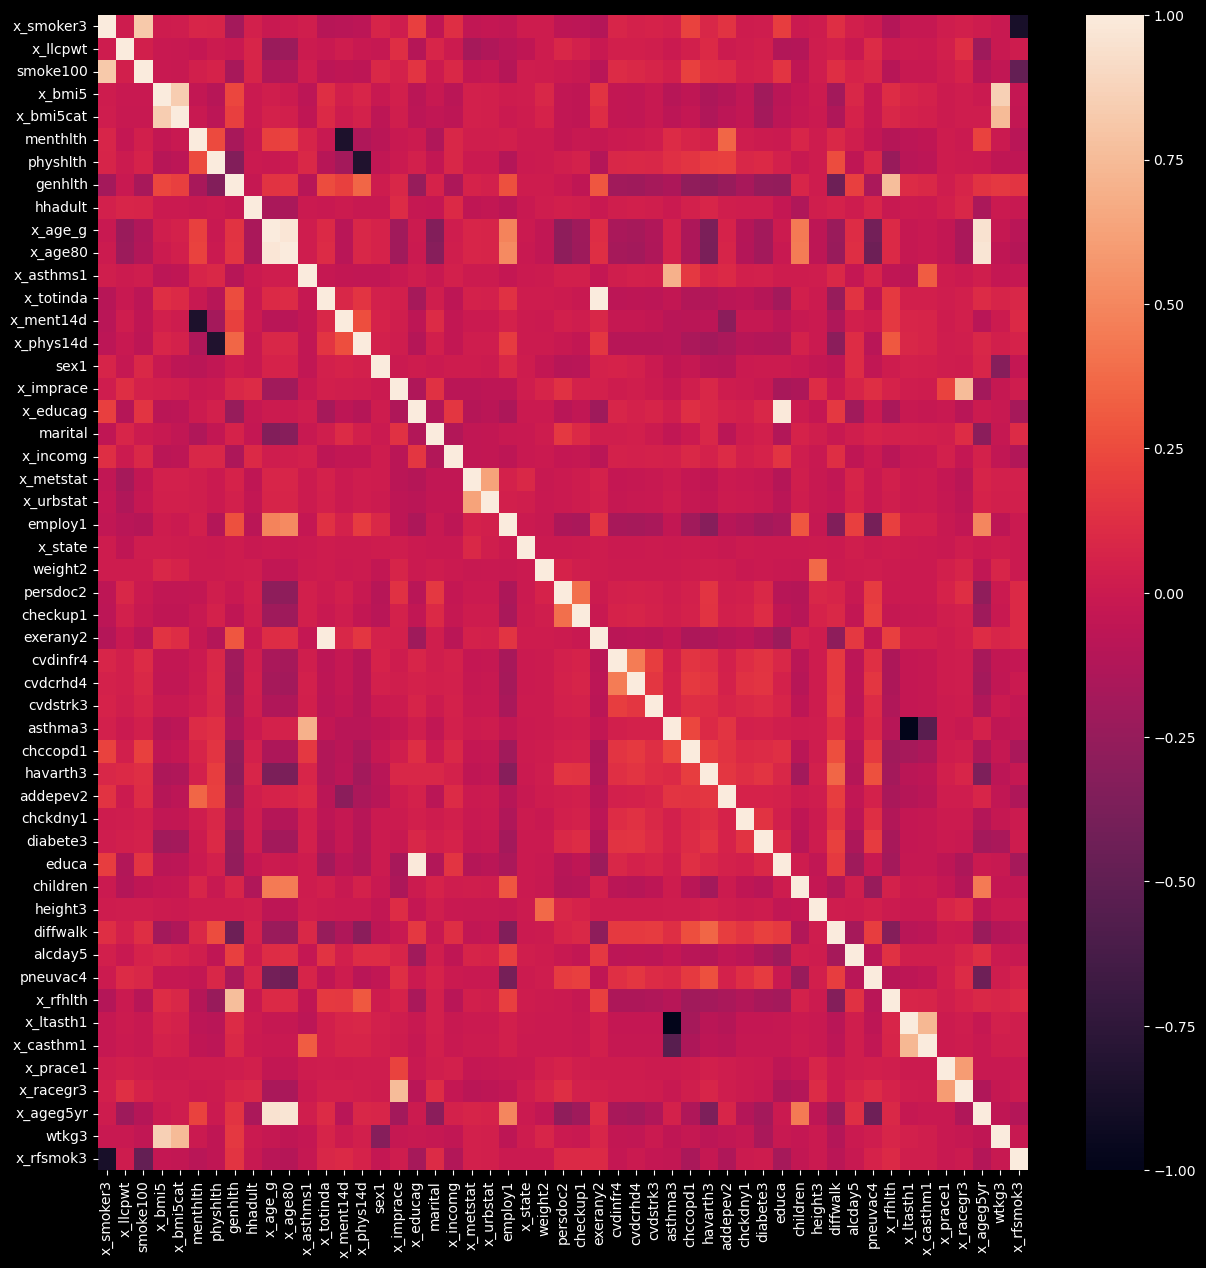

In [7]:
correlation = df2018[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df2018[res_na.index].corr())
plt.show()


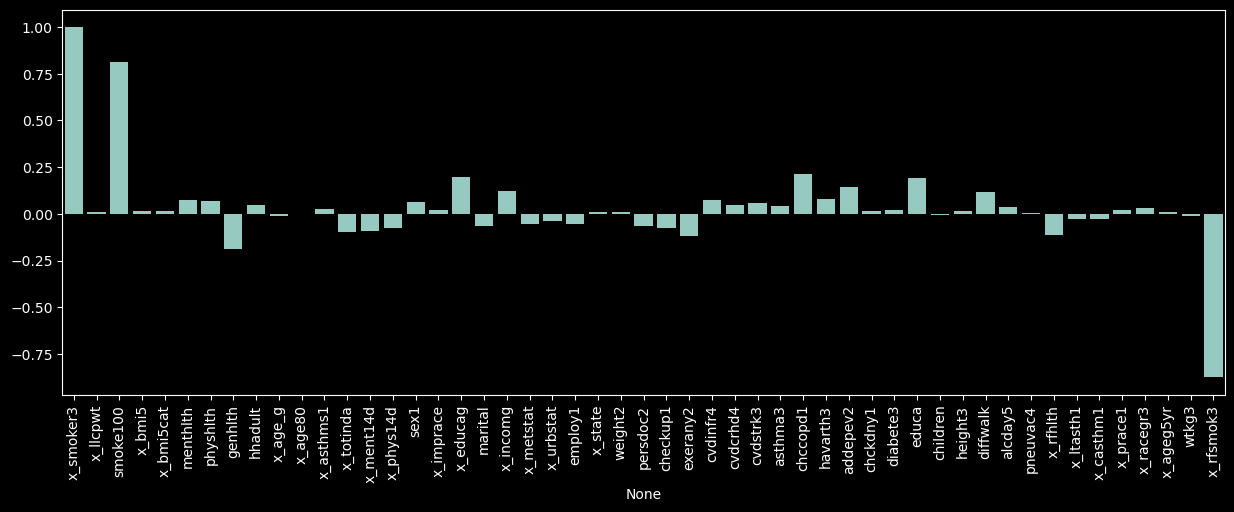

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


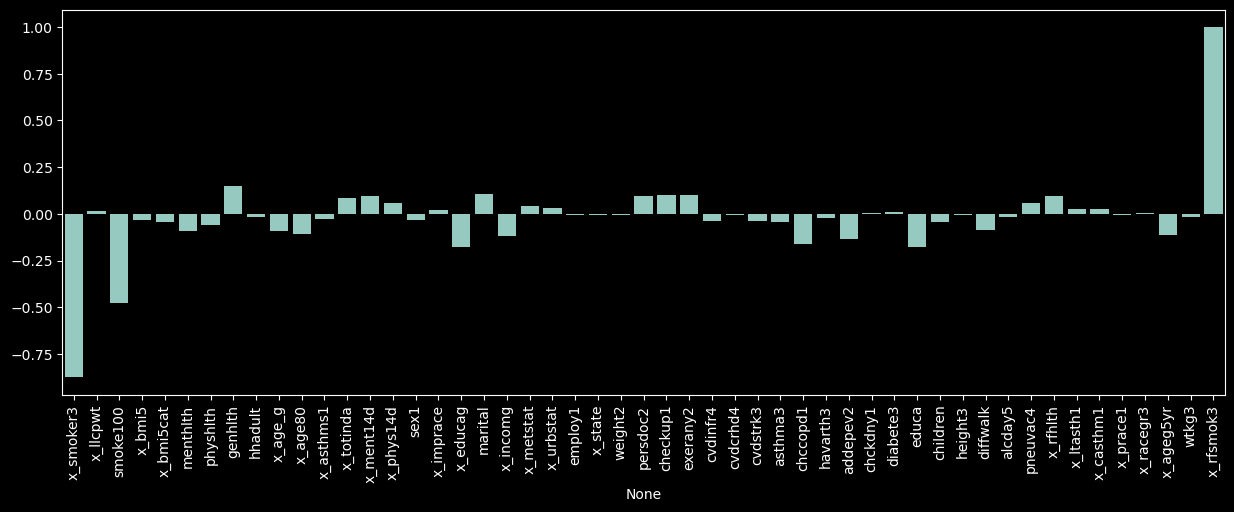

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [8]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [9]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [10]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [11]:
df2018_without_4_smoker3 = df2018.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


x_smoker3
1    118754
0     61272
Name: count, dtype: int64

In [108]:
# X = df2018[numerical_features+categorical_features]
# y = df2018["x_smoker3"]


In [12]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [13]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


0.5159573572258619

In [14]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (180026, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [15]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [114]:
# weights = df2018["x_llcpwt"]


In [16]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [116]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),                            
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      18758.874974
x_ageg5yr    18423.165775
x_age_g      16079.662448
marital       7194.955603
educa         6260.939946
x_educag      6231.439372
pneuvac4      4774.912583
persdoc2      4586.921627
checkup1      4177.424408
addepev2      3129.314508
x_incomg      3112.702831
menthlth      2945.117785
children      2750.358919
genhlth       2584.402223
x_ment14d     2358.385941
exerany2      1667.101926
employ1       1628.902395
x_bmi5cat     1467.638463
chccopd1      1405.554582
x_imprace     1229.233474
x_totinda     1214.004458
x_rfhlth       984.171588
wtkg3          947.890181
x_bmi5         884.800962
havarth3       623.120121
diabete3       596.868842
physhlth       570.666017
x_racegr3      532.496689
cvdcrhd4       508.304058
x_phys14d      378.541874
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'marital', 'educ

Method 2: Recursive Feature Elimination (RFE)

In [117]:
# # Initialize RFE. Select a base estimator and specify the number of features to select.
# rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# # Fit RFE on the processed data (X_processed) and the target (y)
# rfe_selector.fit(X_processed, y)

# # Get the boolean mask of selected features and their ranking
# selected_features_mask_rfe = rfe_selector.support_
# feature_ranking_rfe = rfe_selector.ranking_

# # Get the names of the selected features based on the mask
# selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

# print("Selected features by RFE:")
# print(selected_features_names_rfe)


In [118]:
# rfe_selector_rf = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
# rfe_selector_rf.fit(X_processed, y.values.ravel()) 
# selected_features_mask_rfe_rf = rfe_selector_rf.support_
# selected_features_names_rfe_rf = feature_names_processed[selected_features_mask_rfe_rf].tolist()
# print("\nSelected features by RFE with RandomForestClassifier:")
# print(selected_features_names_rfe_rf)


Method 3: Feature Importance from RandomForestClassifier

In [ ]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


In [ ]:
sorted_feature_importances_rf


num__x_llcpwt     0.108824
num__x_bmi5       0.060224
num__x_age80      0.058450
cat__x_state      0.053418
num__weight2      0.049043
num__wtkg3        0.048868
num__height3      0.044504
num__alcday5      0.041084
cat__x_ageg5yr    0.029391
num__hhadult      0.027308
cat__x_incomg     0.026502
cat__employ1      0.023242
cat__genhlth      0.022366
num__poorhlth     0.022170
cat__educa        0.021984
cat__marital      0.021829
num__physhlth     0.021223
num__menthlth     0.020888
cat__x_educag     0.020488
cat__x_age_g      0.019436
num__children     0.017036
cat__checkup1     0.016320
cat__chccopd1     0.014152
cat__x_racegr3    0.013880
cat__persdoc2     0.012916
cat__x_ment14d    0.012869
cat__sex1         0.012677
cat__x_phys14d    0.012396
cat__x_imprace    0.012139
cat__x_bmi5cat    0.011595
cat__x_prace1     0.009988
cat__havarth3     0.009471
cat__addepev2     0.009457
cat__pneuvac4     0.009264
cat__diabete3     0.009064
cat__x_metstat    0.008283
cat__x_totinda    0.007622
c

Variance Threshold

In [ ]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)



--- روش فیلتری: آستانه واریانس (Variance Threshold) ---
تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 34
ویژگی‌های انتخاب شده:
['num__x_llcpwt', 'num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__diabete3', 'cat__pneuvac4', 'cat__x_rfsmok3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [43]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


KeyboardInterrupt: 

### VIF Method

In [ ]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0
        
#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns
        
#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()
        
#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")
            
#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break
            
#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


KeyboardInterrupt: 

In [17]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(180026, 24)

In [18]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # محاسبه امتیاز F1-score به صورت متقابل
# # ما از F1-weighted استفاده می‌کنیم که برای داده‌های نامتوازن مناسب است.
# # **نکته مهم:** cross_val_score به ما اجازه نمی‌دهد وزن نمونه را مستقیماً بدهیم.
# # این یکی از محدودیت‌های آن است. اما می‌توانیم scale_pos_weight را نگه داریم.
# f1_scores = cross_val_score(lgb_pipeline, X, y, cv=cv, scoring='f1_weighted')

# print(f"\n--- نتایج اعتبارسنجی متقابل (Stratified 5-Fold) ---")
# print(f"امتیازات F1-Score برای هر Fold: {np.round(f1_scores, 4)}")
# print(f"میانگین امتیاز F1-Score: {f1_scores.mean():.4f}")
# print(f"انحراف معیار امتیازات F1-Score: {f1_scores.std():.4f}")

# # می‌توانید این کار را برای AUC هم انجام دهید
# auc_scores = cross_val_score(lgb_pipeline, X, y, cv=cv, scoring='roc_auc')
# print(f"\nمیانگین امتیاز AUC-ROC (با Cross-Validation): {auc_scores.mean():.4f}")


# White/Black box models on VIF/ALL features

In [19]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()
    
    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])
    
    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time
    

    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")
    

    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()
    
    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)
        
        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20)) 
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5) 
        plt.title(f"Decision Tree for {model_name}")
        plt.show()
        
        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)
        
        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),
    
    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 4.67 seconds.
Accuracy: 0.6926 | F1-Score: 0.6992 | AUC: 0.7566


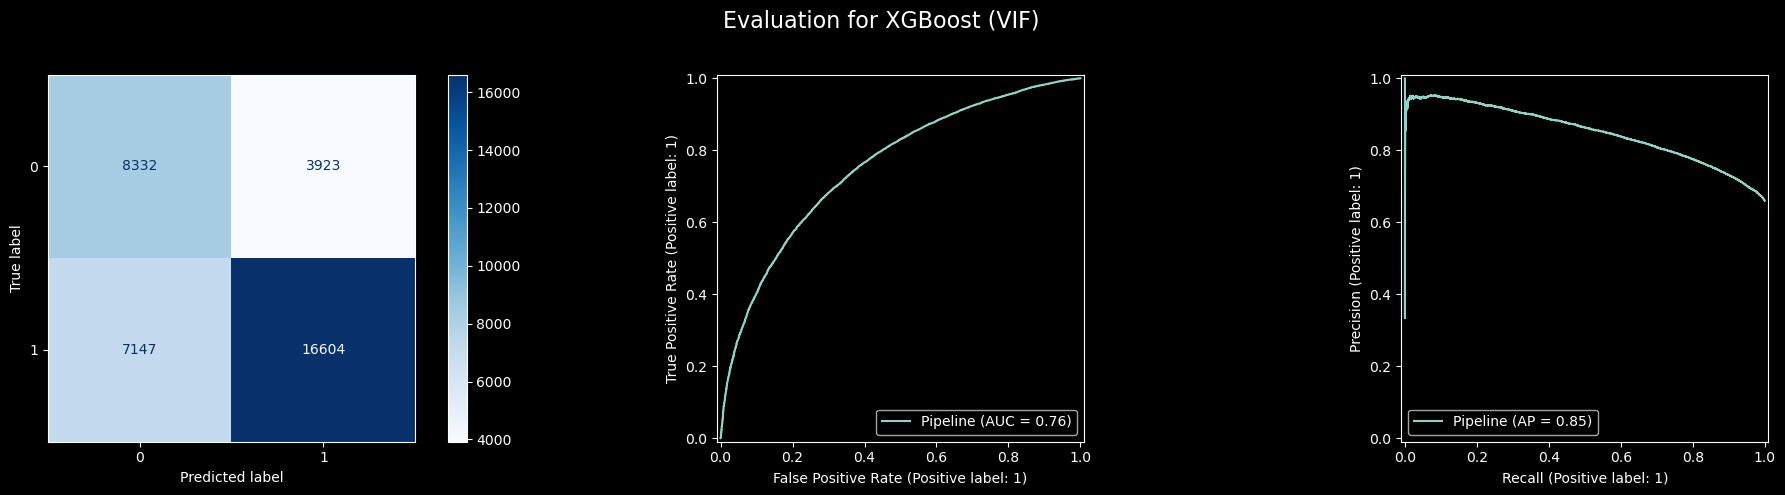


--- SHAP Analysis for XGBoost (VIF) ---


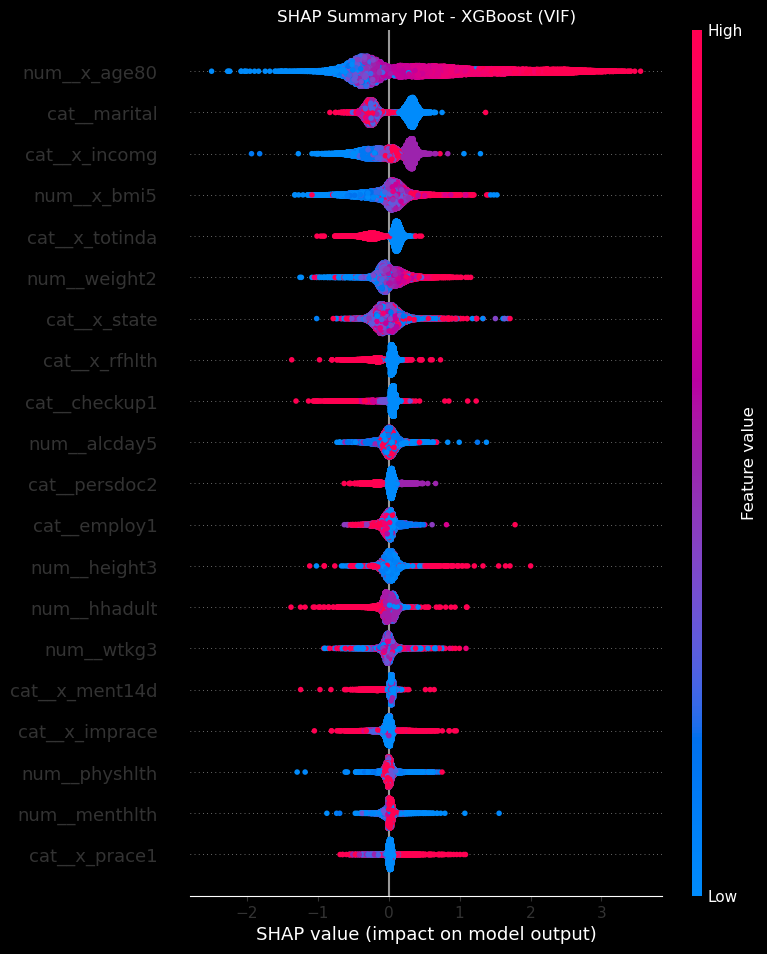


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 95003, number of negative: 49017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 144020, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609519 -> initscore=0.445293
[LightGBM] [Info] Start training from score 0.445293
Training completed in 7.28 seconds.
Accuracy: 0.6980 | F1-Score: 0.7053 | AUC: 0.7705


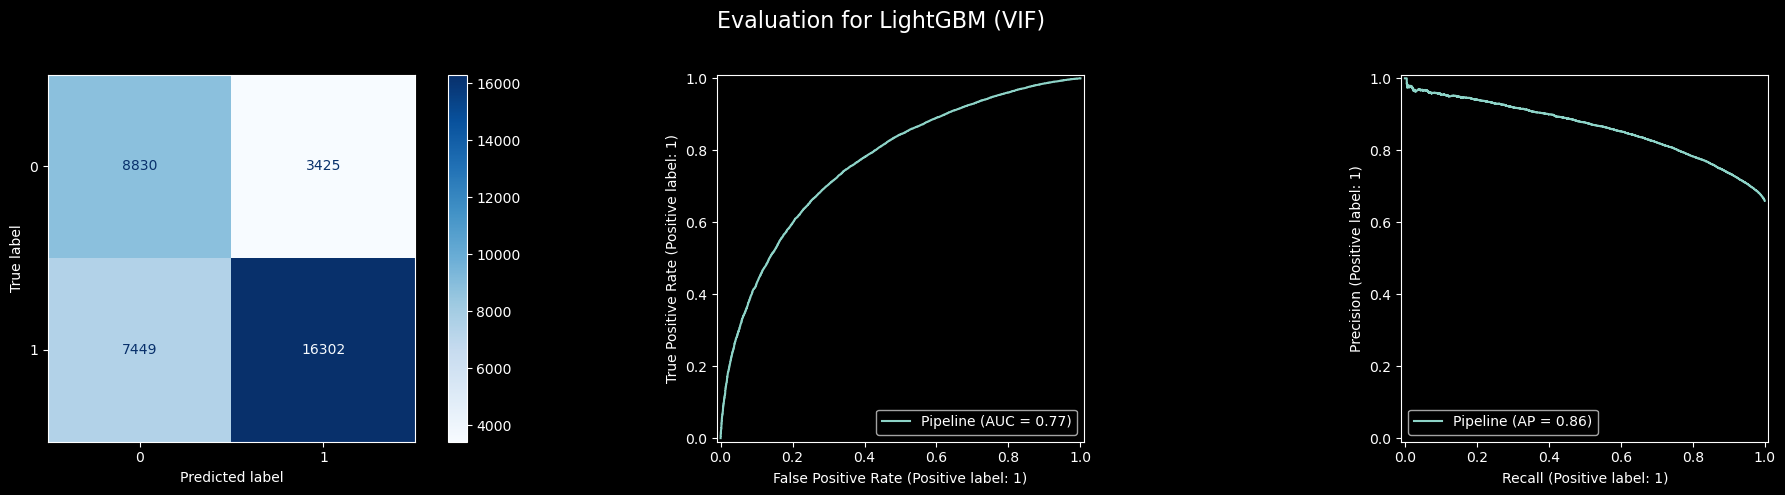


--- SHAP Analysis for LightGBM (VIF) ---


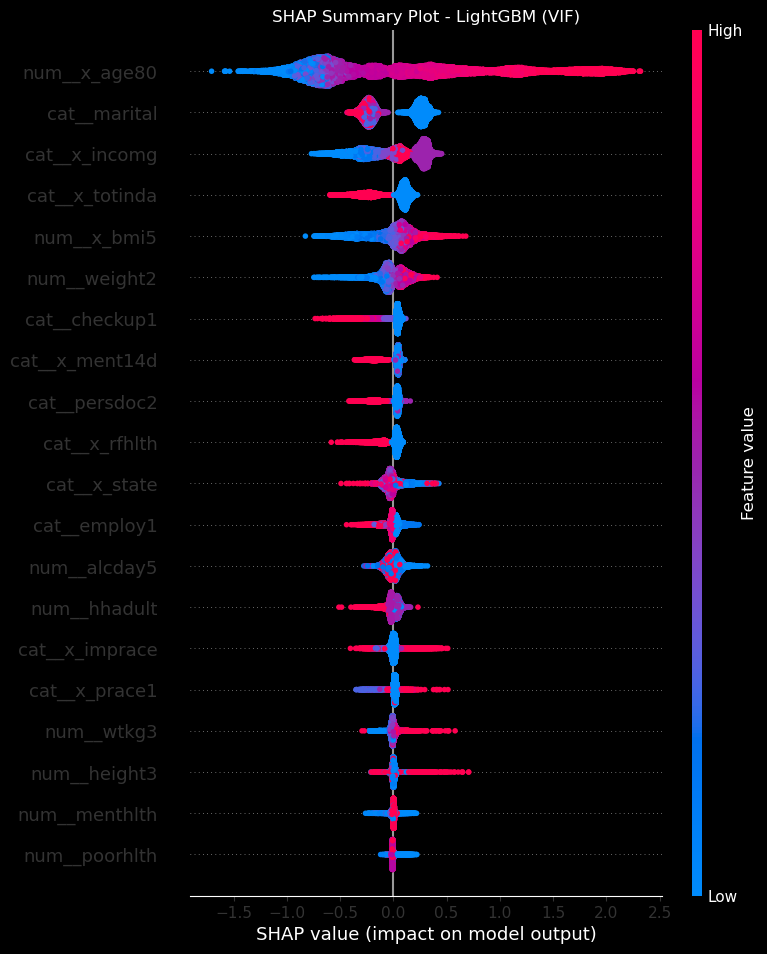


===== Training model: CatBoost (VIF) =====
Training completed in 139.65 seconds.
Accuracy: 0.6998 | F1-Score: 0.7066 | AUC: 0.7680


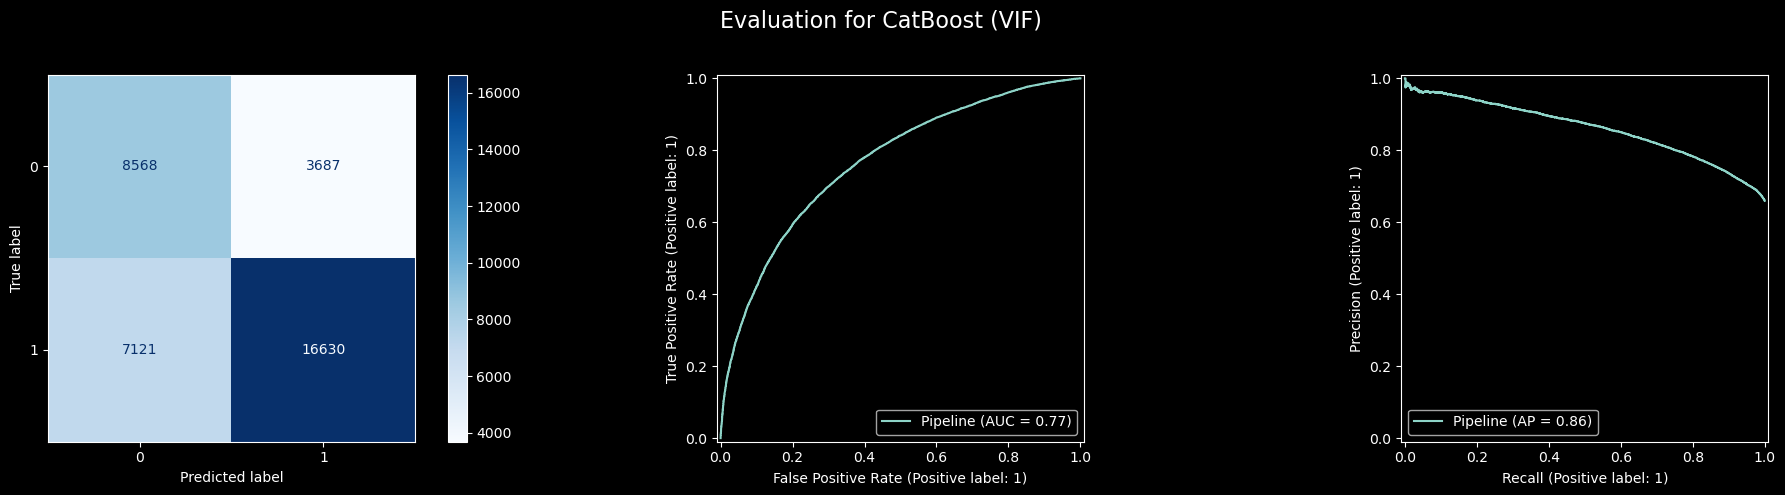


--- SHAP Analysis for CatBoost (VIF) ---


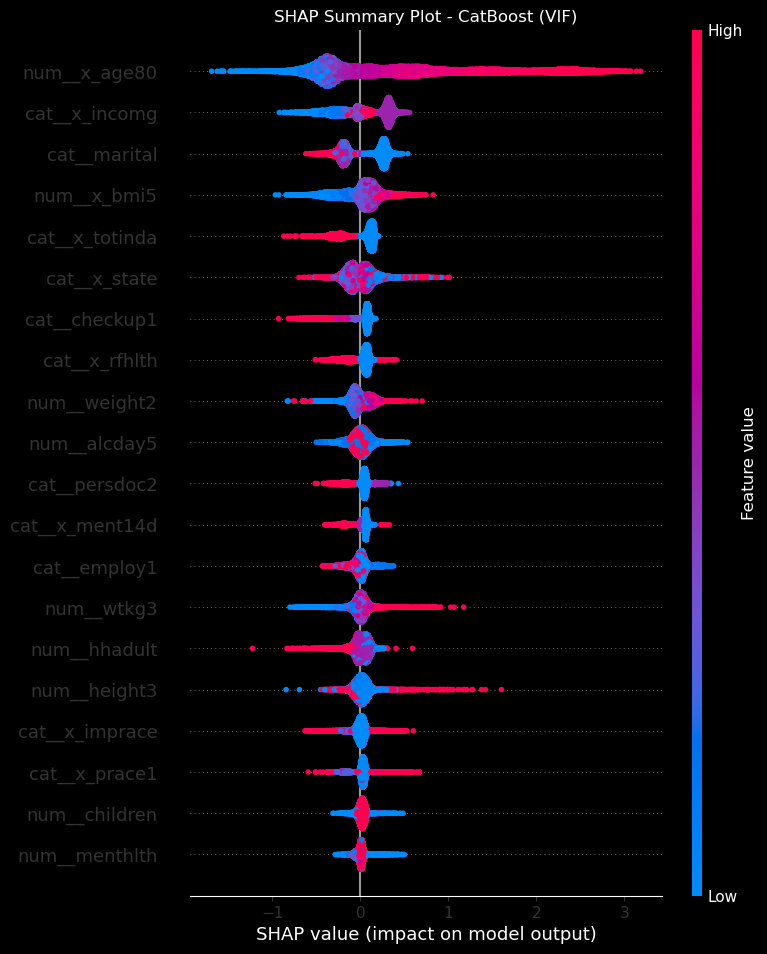


===== Training model: Logistic Regression (VIF) =====
Training completed in 6.26 seconds.
Accuracy: 0.7027 | F1-Score: 0.6735 | AUC: 0.7393


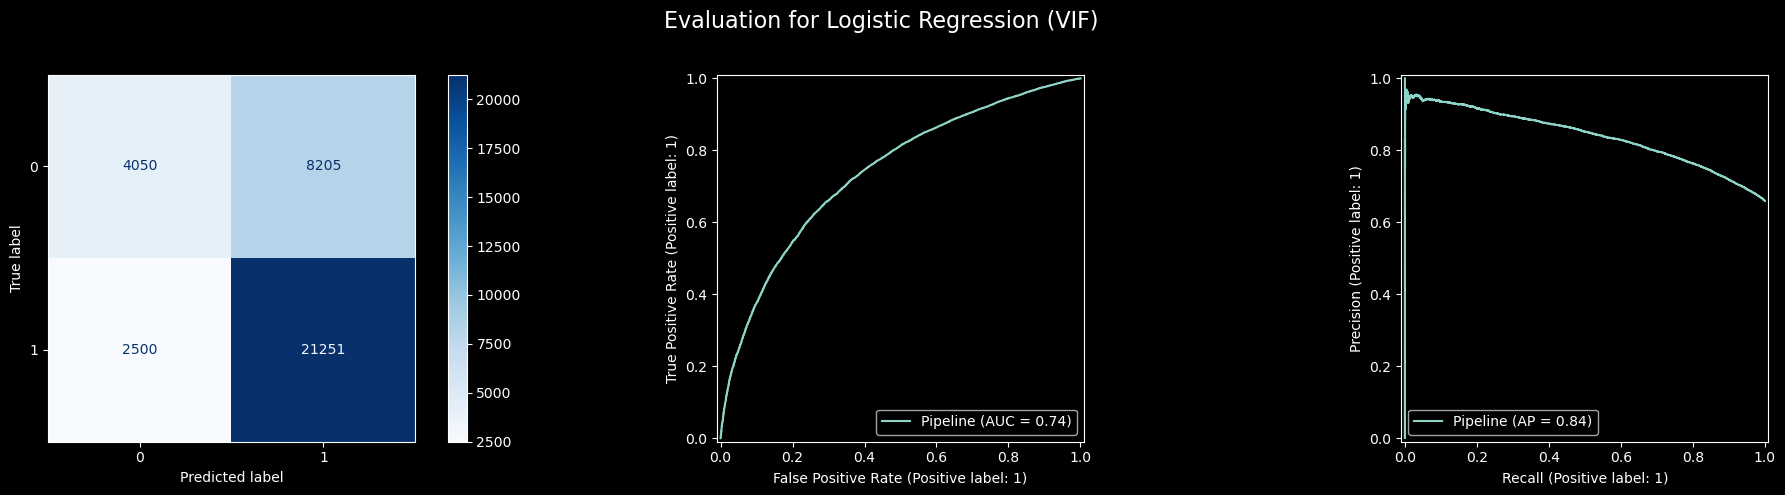


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.573920    1.775212
12  cat__x_totinda    -0.353306    0.702362
23   cat__x_rfhlth    -0.184757    0.831306
22   cat__checkup1    -0.131598    0.876694
17    cat__marital    -0.114754    0.891586
21   cat__persdoc2    -0.099431    0.905352
3       num__wtkg3     0.084696    1.088386
1      num__x_bmi5     0.079307    1.082537
18   cat__x_incomg     0.073396    1.076157
13  cat__x_ment14d    -0.067025    0.935172
7     num__alcday5    -0.046612    0.954458
11  cat__x_casthm1    -0.040417    0.960389
4     num__height3     0.039543    1.040335
19    cat__employ1    -0.033221    0.967324
9    num__physhlth     0.030650    1.031125
6     num__hhadult    -0.026393    0.973952
5    num__children    -0.025488    0.974834
15  cat__x_imprace     0.016871    1.017014
8    num__menthlth     0.015082    1.015196
10   num__poorhlth     0.011458    1.011523
14  cat__x_phys14d    -0.006940    0.993084
2 

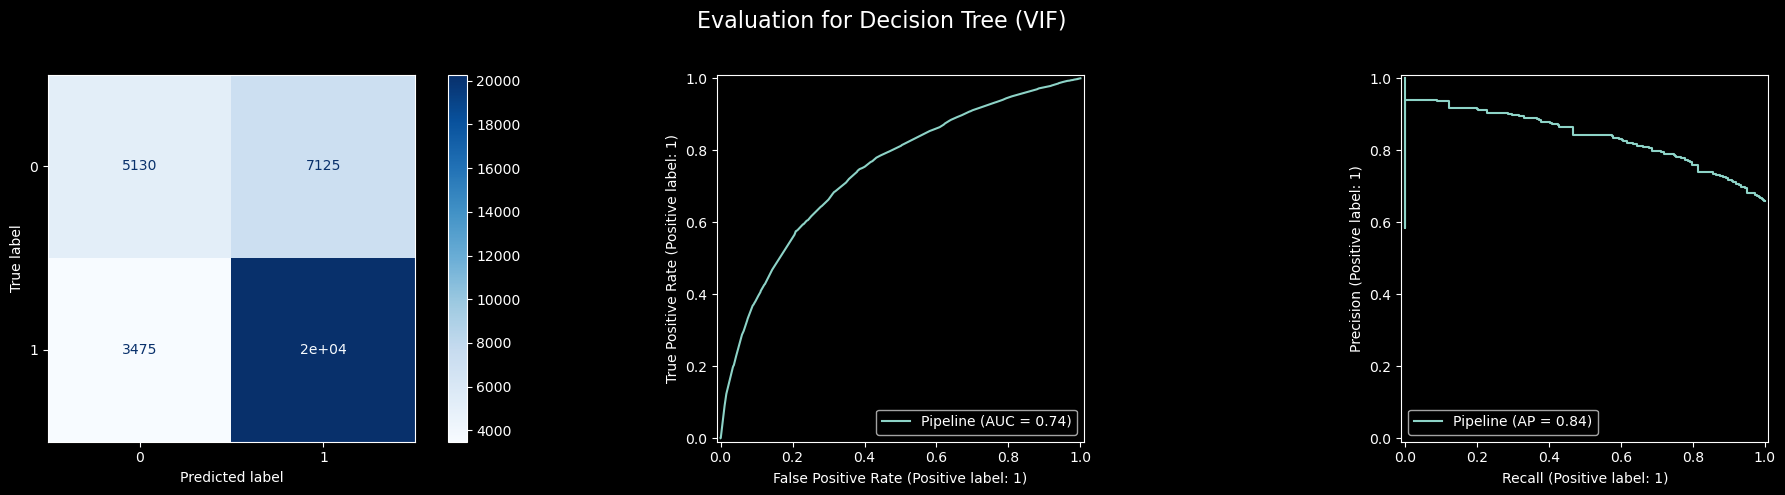


--- Decision Tree Analysis ---


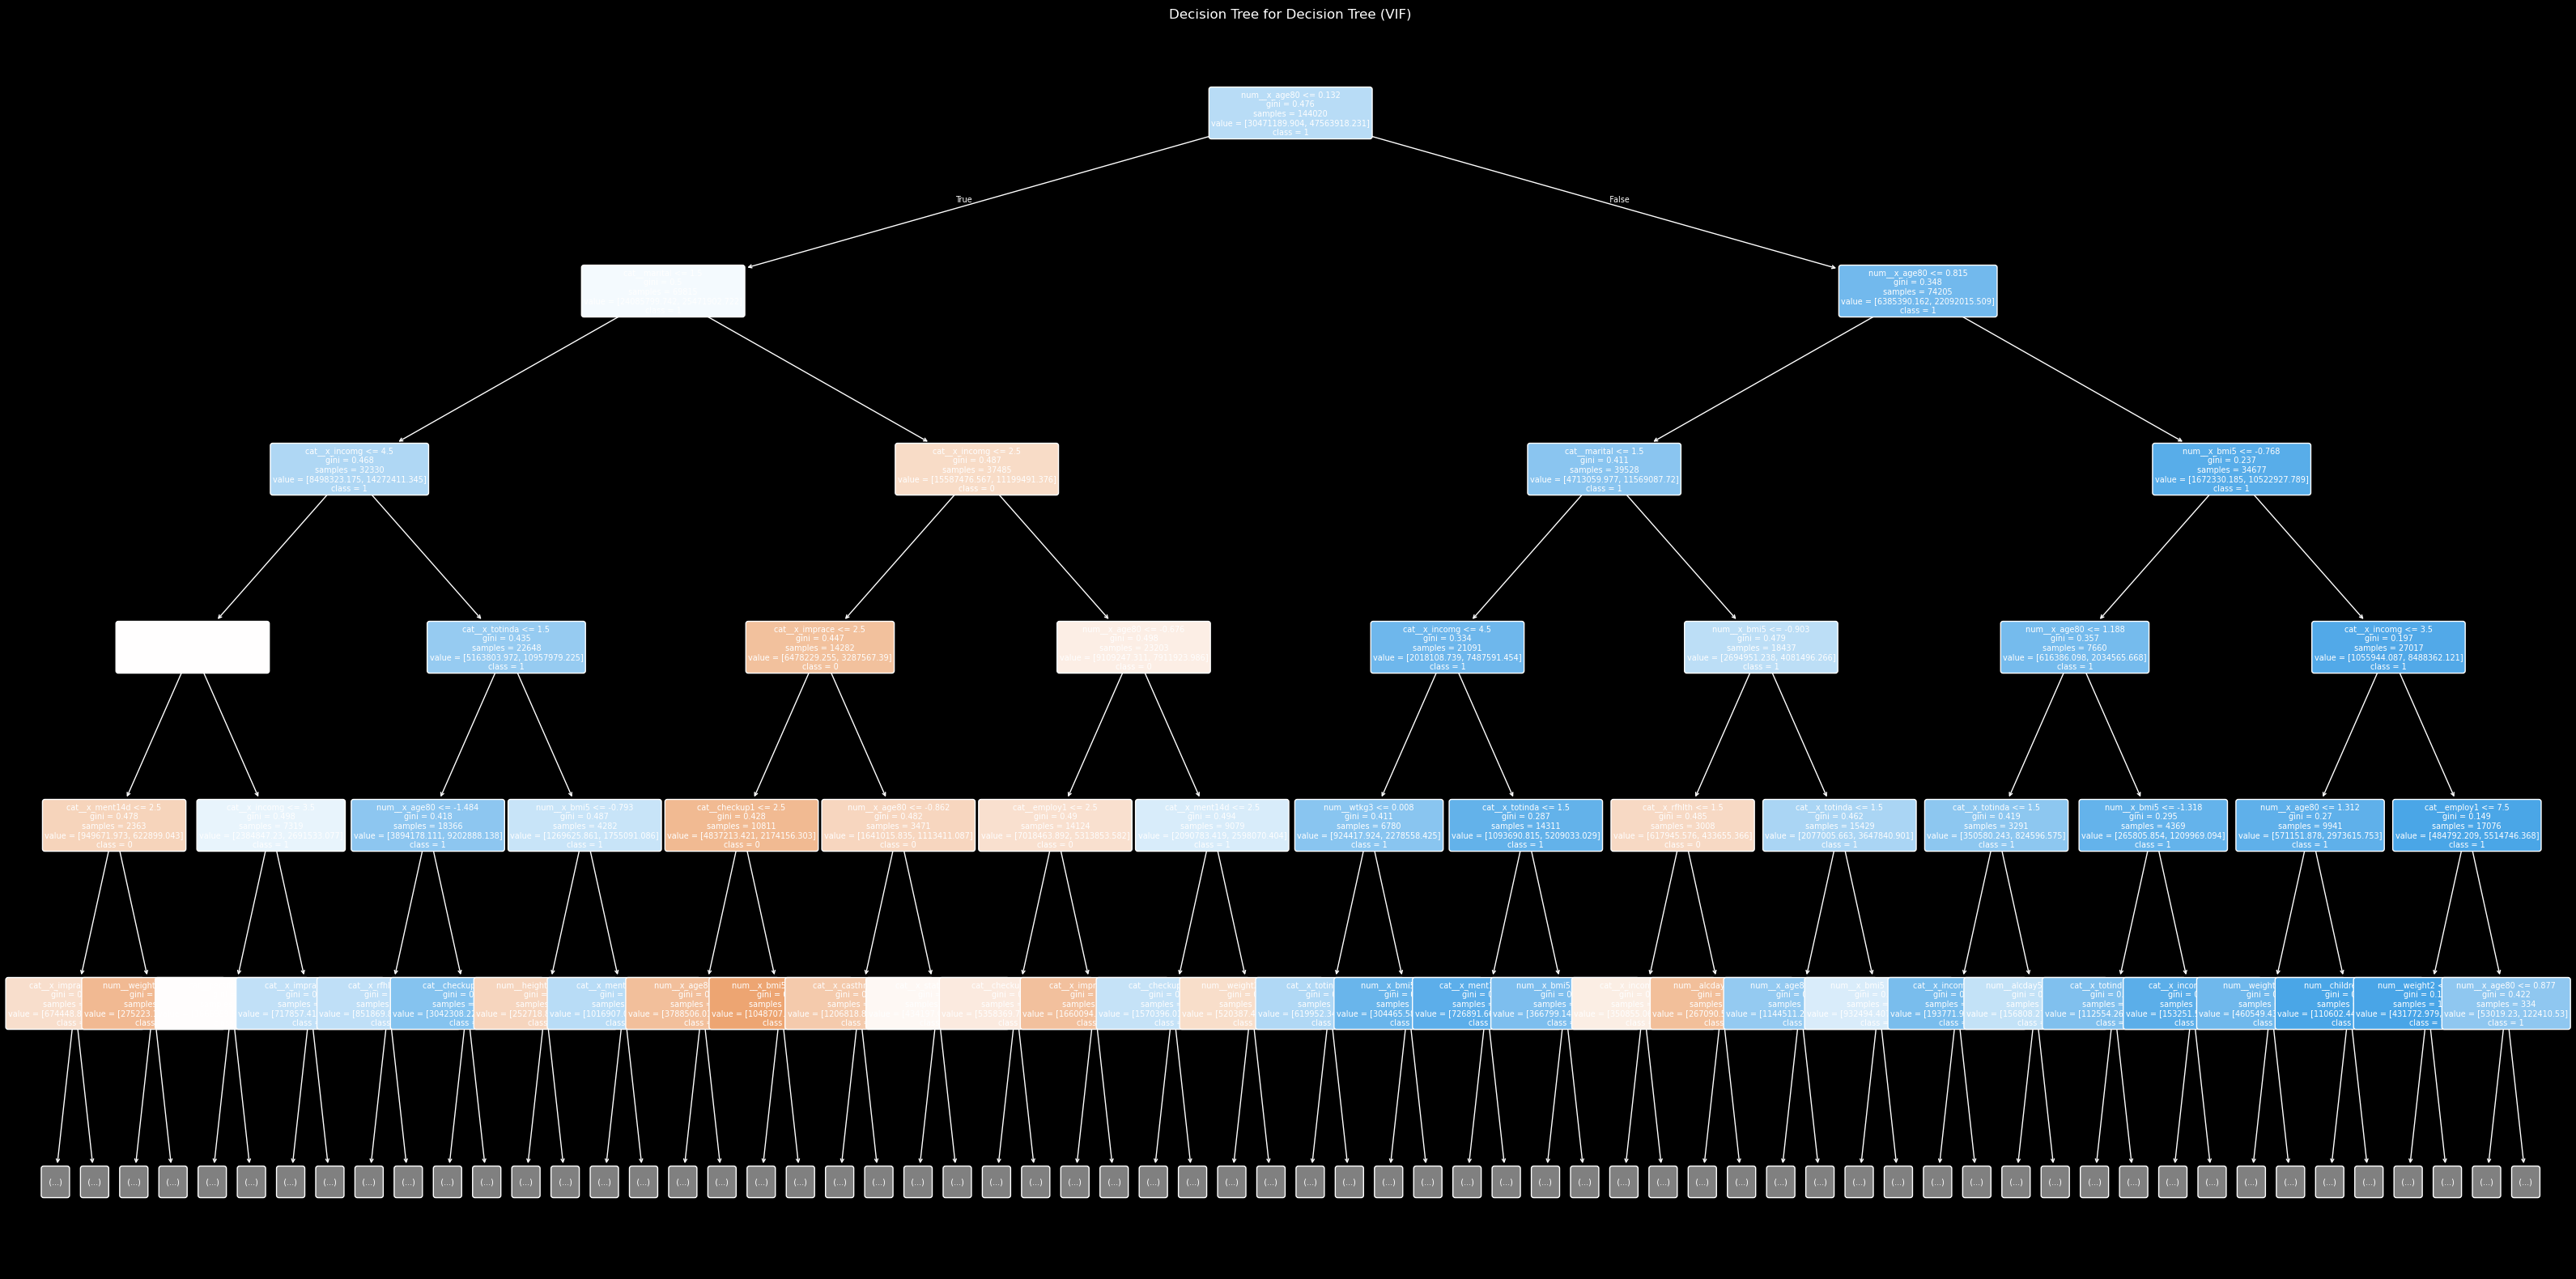

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.13
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__x_bmi5 <= -0.55
|   |   |   |   |--- cat__x_ment14d <= 2.50
|   |   |   |   |   |--- cat__x_imprace <= 2.50
|   |   |   |   |   |   |--- num__x_bmi5 <= -1.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_bmi5 >  -1.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cat__x_imprace >  2.50
|   |   |   |   |   |   |--- num__weight2 <= -0.16
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__weight2 >  -0.16
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__x_ment14d >  2.50
|   |   |   |   |   |--- num__weight2 <= -0.17
|   |   |   |   |   |   |--- num__physhlth <= -1.18
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__physhlth >  -1.18

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training

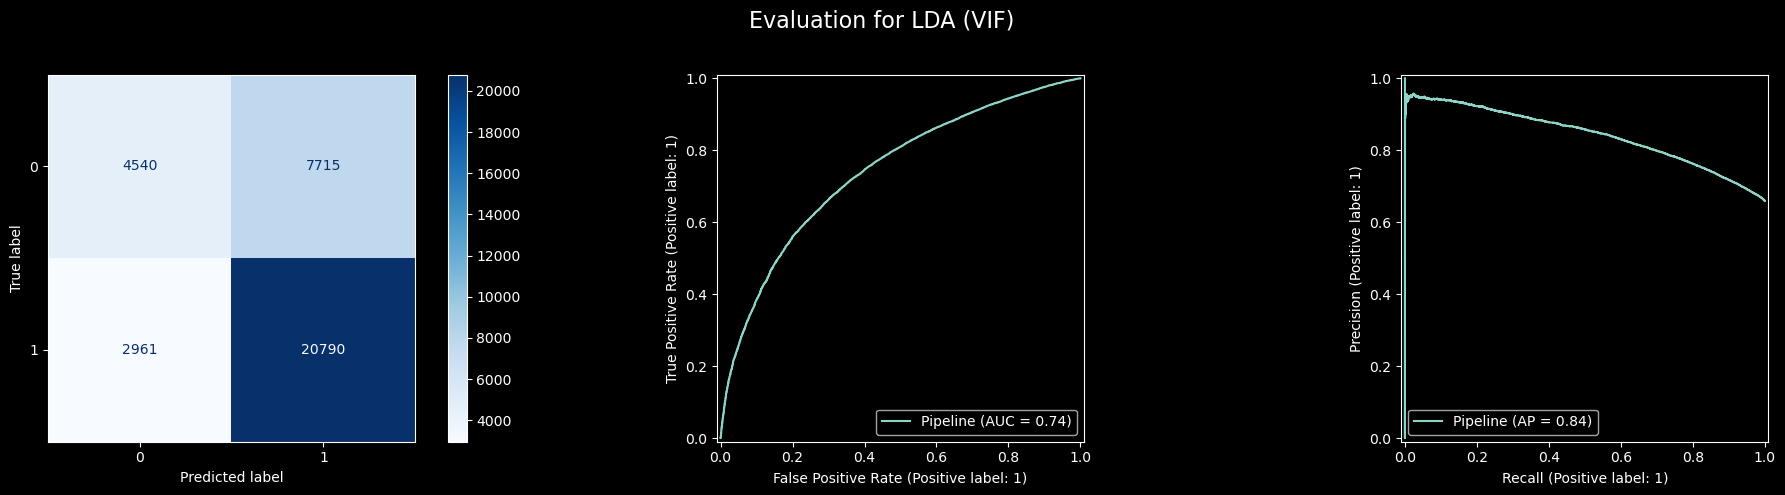


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.737966
12  cat__x_totinda    -0.387355
23   cat__x_rfhlth    -0.194719
22   cat__checkup1    -0.166914
3       num__wtkg3     0.162413
17    cat__marital    -0.121181
21   cat__persdoc2    -0.111055
1      num__x_bmi5     0.106569
18   cat__x_incomg     0.091175
13  cat__x_ment14d    -0.065794
7     num__alcday5    -0.062058
8    num__menthlth     0.034205
10   num__poorhlth     0.033825
5    num__children    -0.033352
19    cat__employ1    -0.032608
4     num__height3     0.032071
15  cat__x_imprace    -0.023673
9    num__physhlth     0.020012
11  cat__x_casthm1    -0.018377
6     num__hhadult    -0.017246
14  cat__x_phys14d    -0.016235
2     num__weight2    -0.005953
16   cat__x_prace1     0.001097
20    cat__x_state    -0.000655


In [20]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 5.58 seconds.
Accuracy: 0.7076 | F1-Score: 0.7137 | AUC: 0.7736


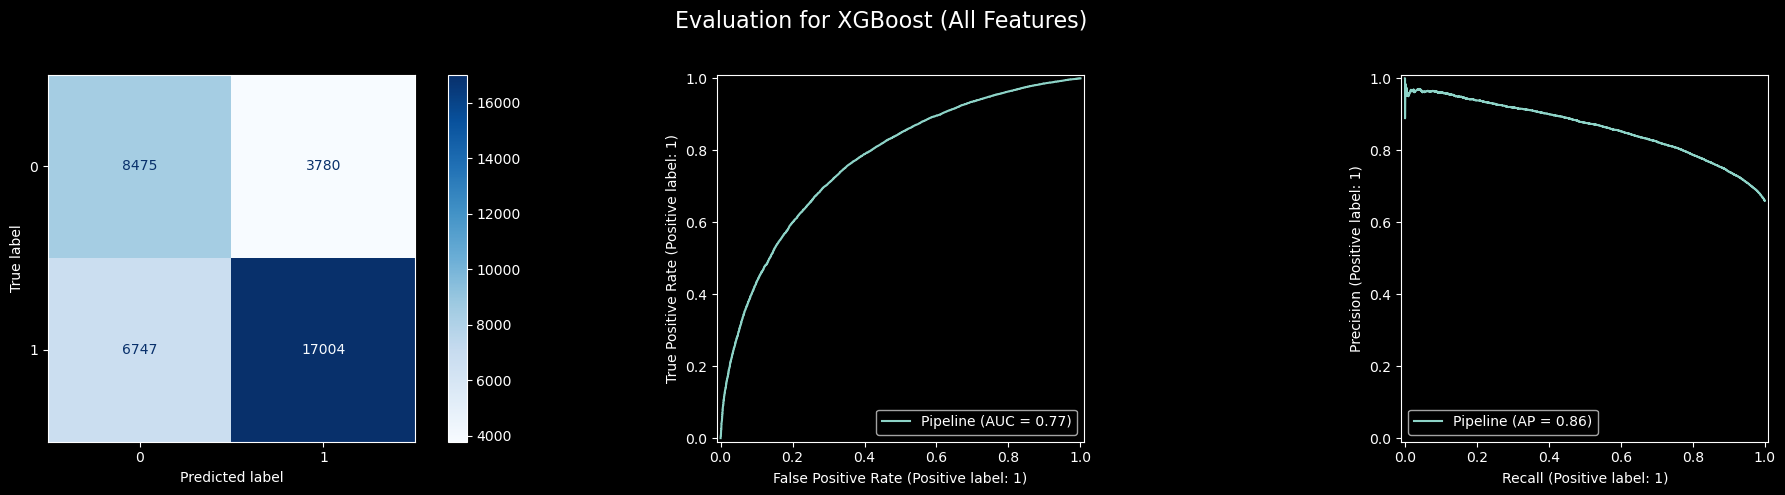


--- SHAP Analysis for XGBoost (All Features) ---


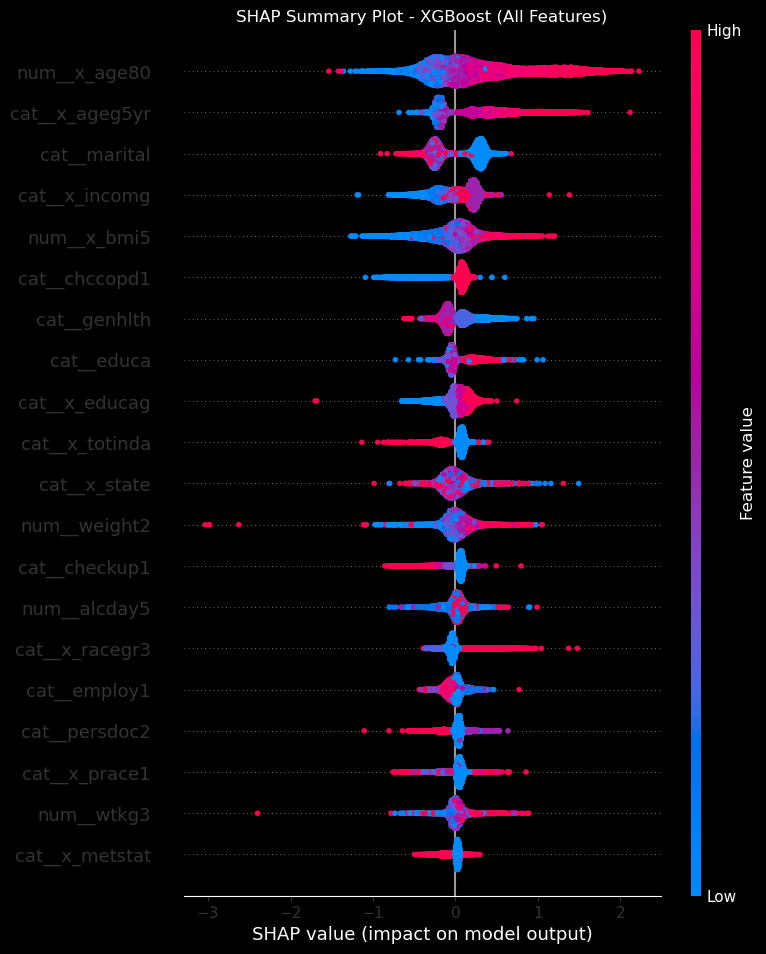


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 95003, number of negative: 49017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 144020, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609519 -> initscore=0.445293
[LightGBM] [Info] Start training from score 0.445293
Training completed in 4.67 seconds.
Accuracy: 0.7115 | F1-Score: 0.7183 | AUC: 0.7858


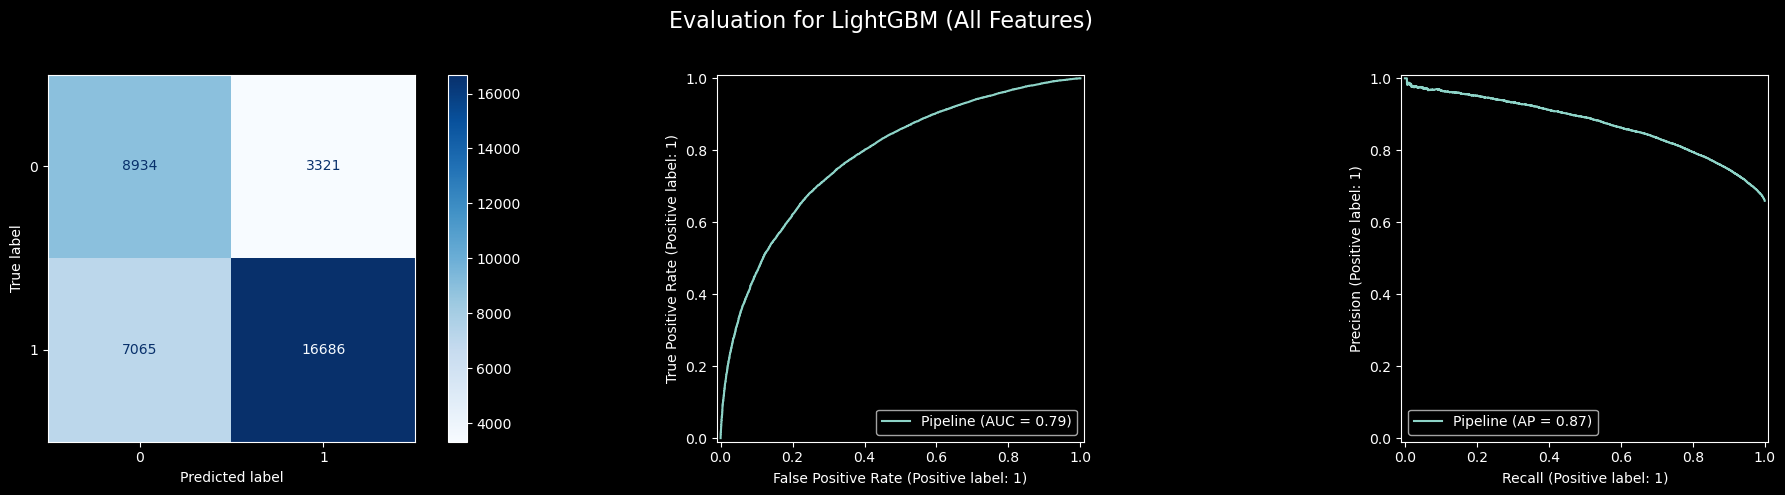


--- SHAP Analysis for LightGBM (All Features) ---


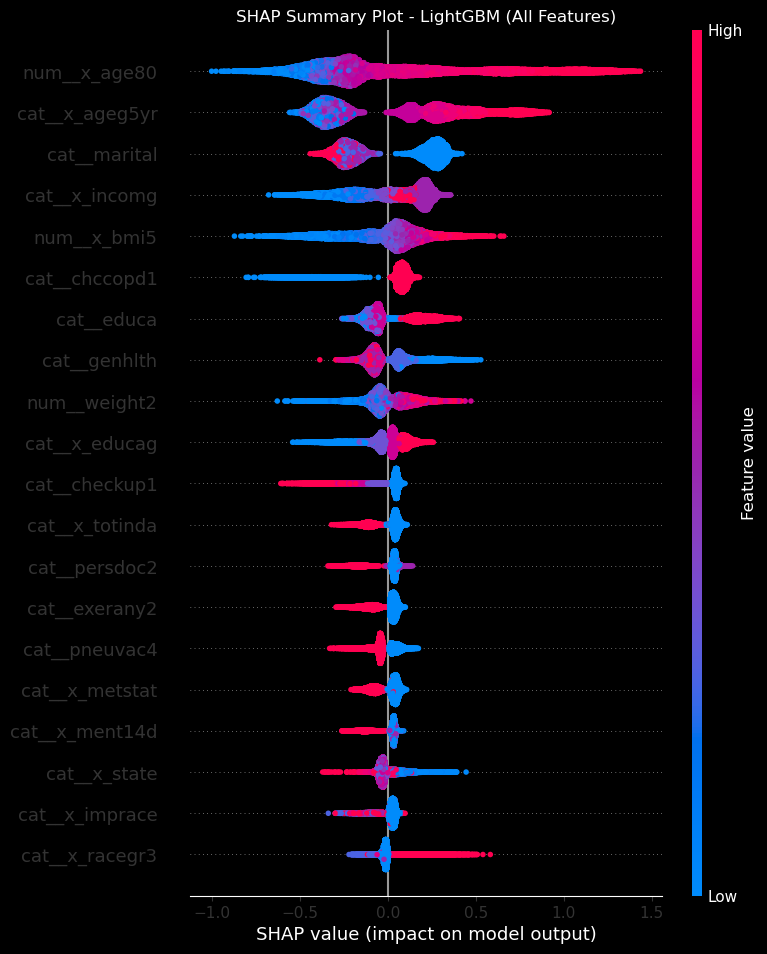


===== Training model: CatBoost (All Features) =====
Training completed in 97.96 seconds.
Accuracy: 0.7140 | F1-Score: 0.7201 | AUC: 0.7837


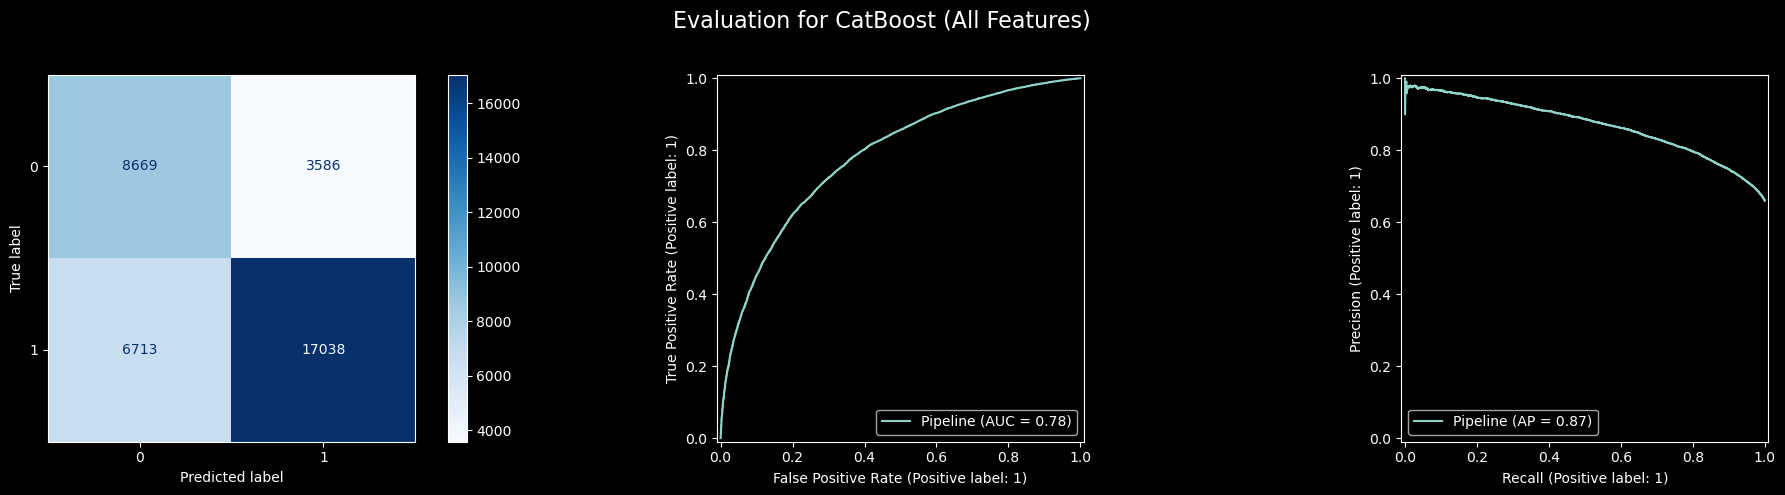


--- SHAP Analysis for CatBoost (All Features) ---


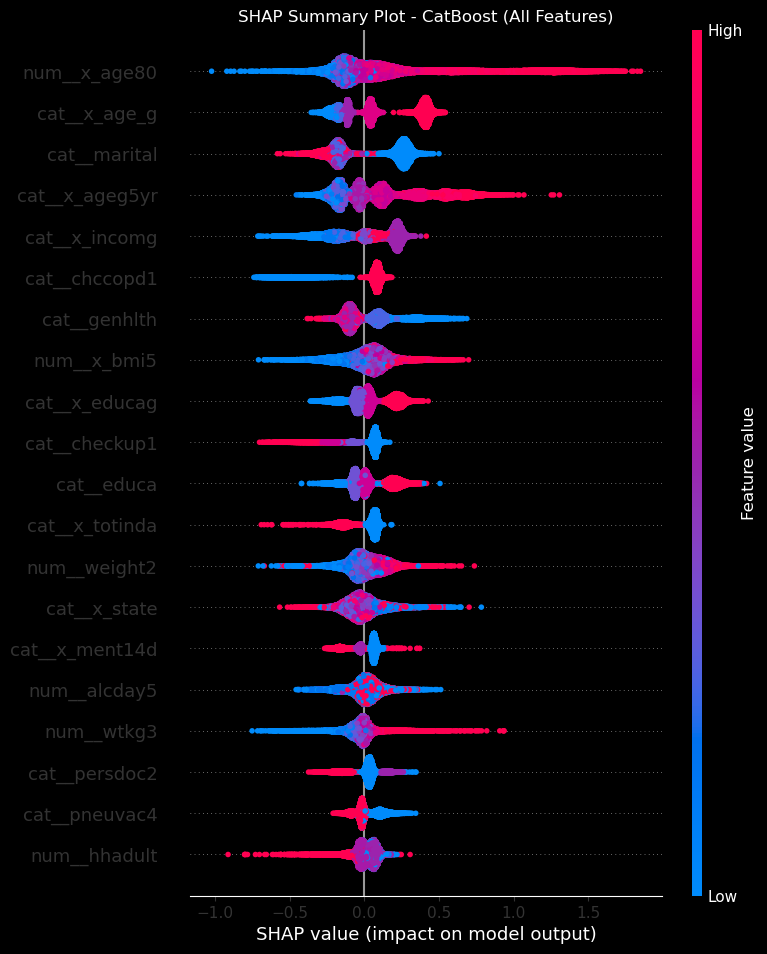


===== Training model: Logistic Regression (All Features) =====
Training completed in 21.92 seconds.
Accuracy: 0.7211 | F1-Score: 0.7022 | AUC: 0.7655


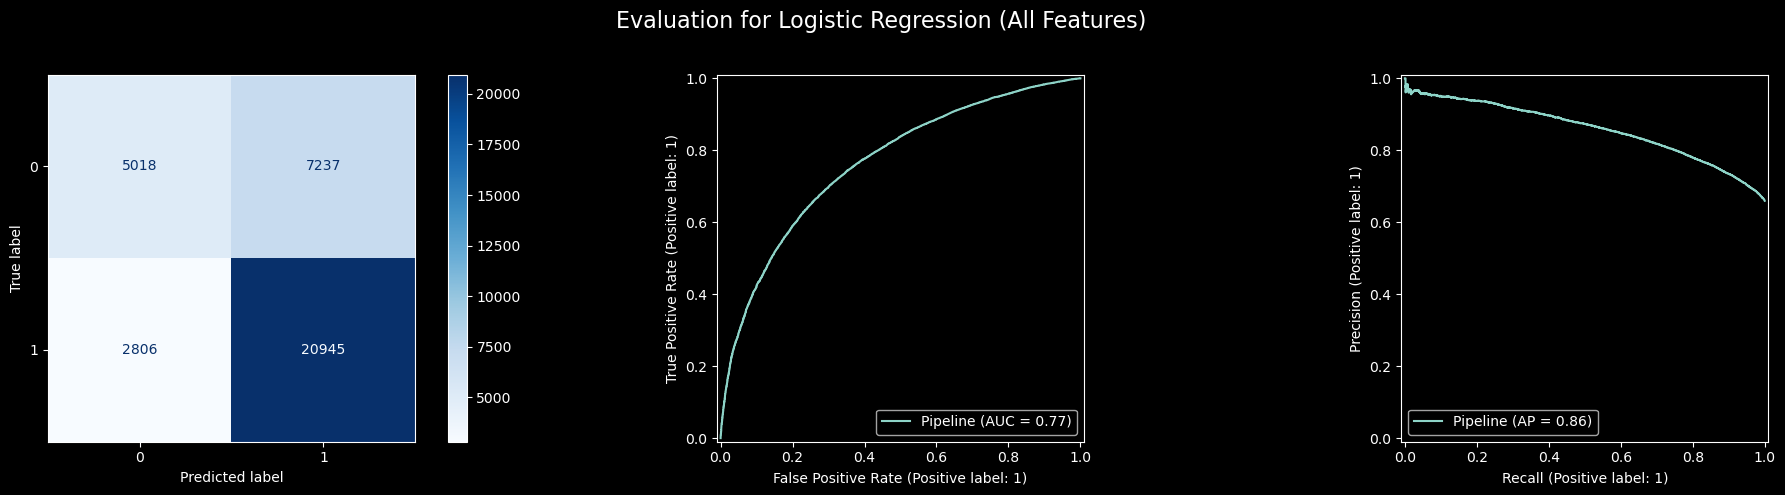


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.953159    2.593890
39   cat__chccopd1     0.560165    1.750962
42   cat__chckdny1    -0.452370    0.636119
13    cat__x_age_g    -0.443090    0.642049
41   cat__addepev2     0.269111    1.308801
36   cat__cvdcrhd4    -0.240707    0.786072
38    cat__asthma3    -0.235739    0.789987
45   cat__pneuvac4    -0.214879    0.806639
25   cat__x_educag     0.198583    1.219673
12    cat__genhlth    -0.197678    0.820634
18   cat__exerany2    -0.195923    0.822075
29  cat__x_metstat    -0.185705    0.830519
35   cat__cvdinfr4     0.137671    1.147598
11  cat__x_bmi5cat     0.125453    1.133662
27    cat__marital    -0.114783    0.891559
34   cat__checkup1    -0.113123    0.893041
44   cat__diffwalk     0.103635    1.109195
17  cat__x_totinda    -0.084639    0.918844
37   cat__cvdstrk3     0.083892    1.087512
47  cat__x_ageg5yr     0.083340    1.086911
33   cat__persdoc2    -0.082145    0.921139
46

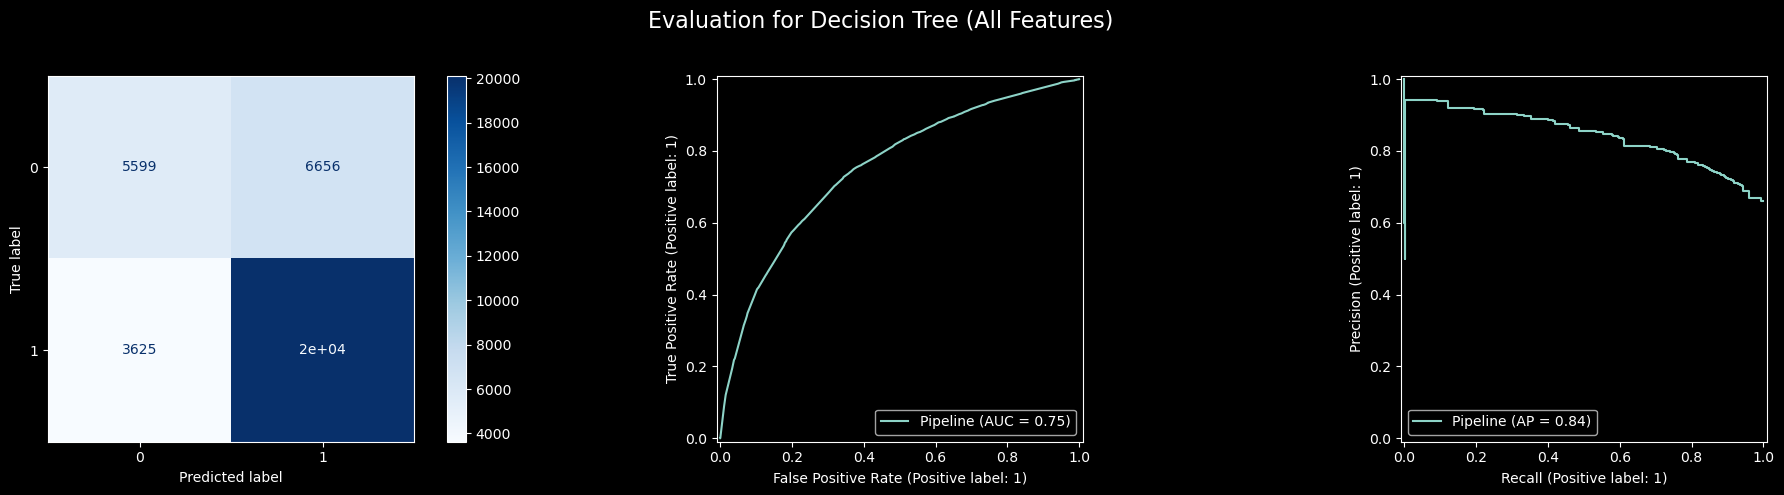


--- Decision Tree Analysis ---


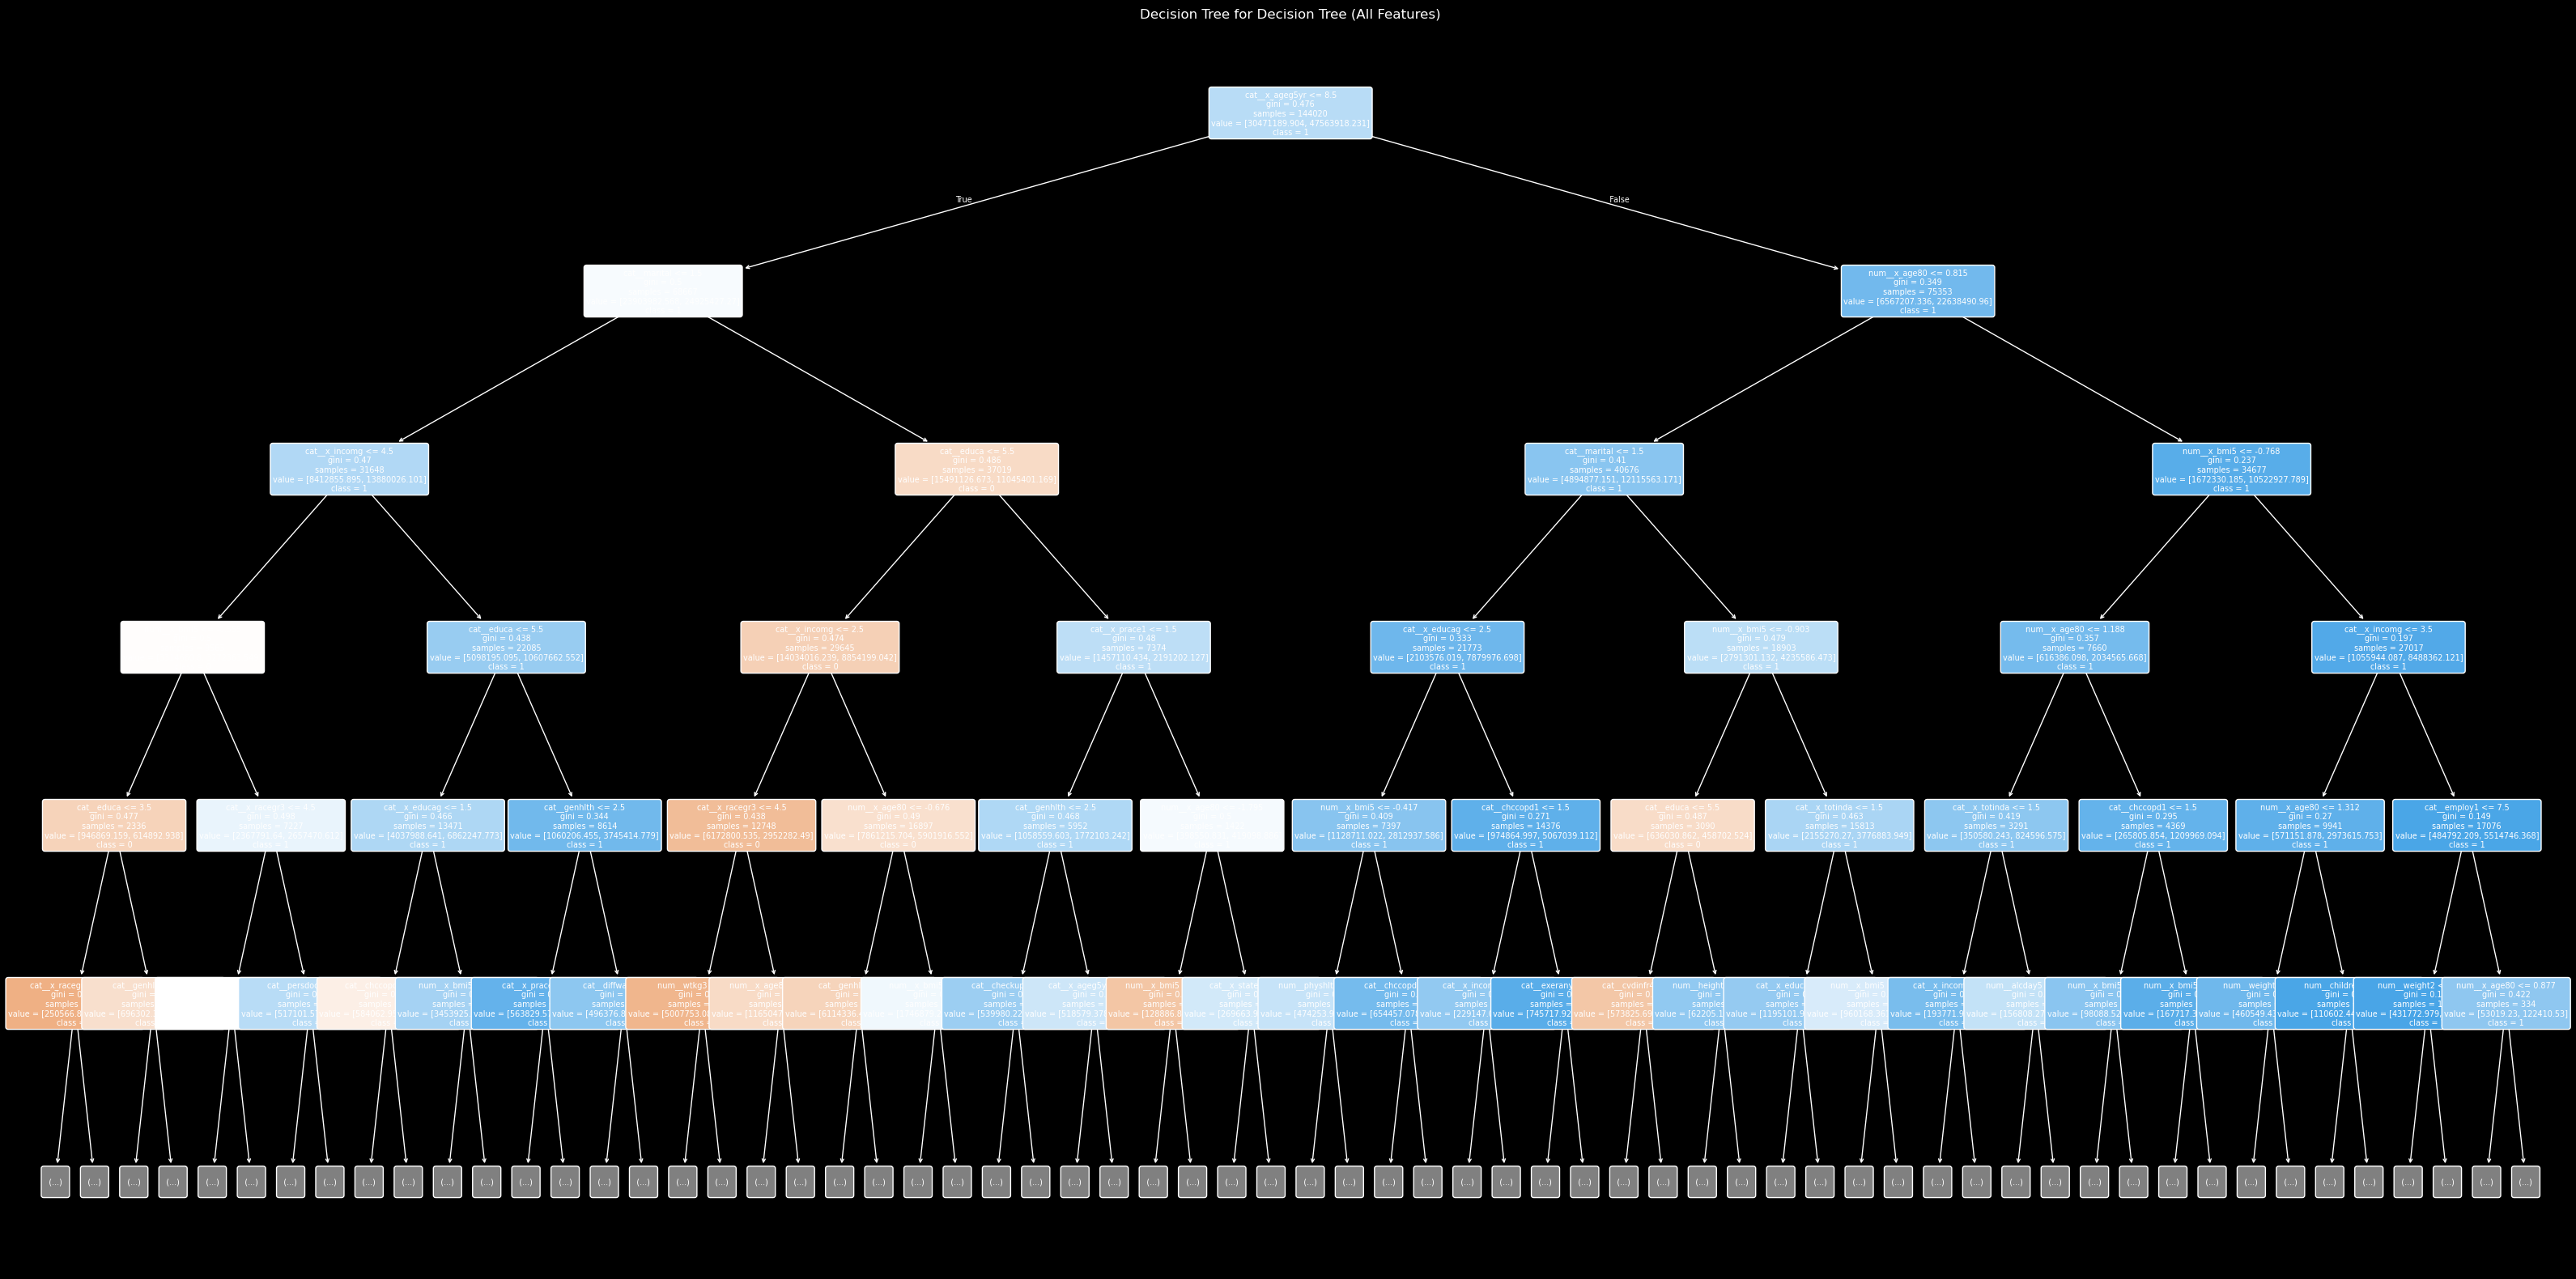

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 8.50
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__x_bmi5 <= -0.55
|   |   |   |   |--- cat__educa <= 3.50
|   |   |   |   |   |--- cat__x_racegr3 <= 4.50
|   |   |   |   |   |   |--- num__weight2 <= -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__weight2 >  -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cat__x_racegr3 >  4.50
|   |   |   |   |   |   |--- num__children <= -1.80
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__children >  -1.80
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__educa >  3.50
|   |   |   |   |   |--- cat__genhlth <= 1.50
|   |   |   |   |   |   |--- num__height3 <= 0.14
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__height3 >  0.14

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Traini

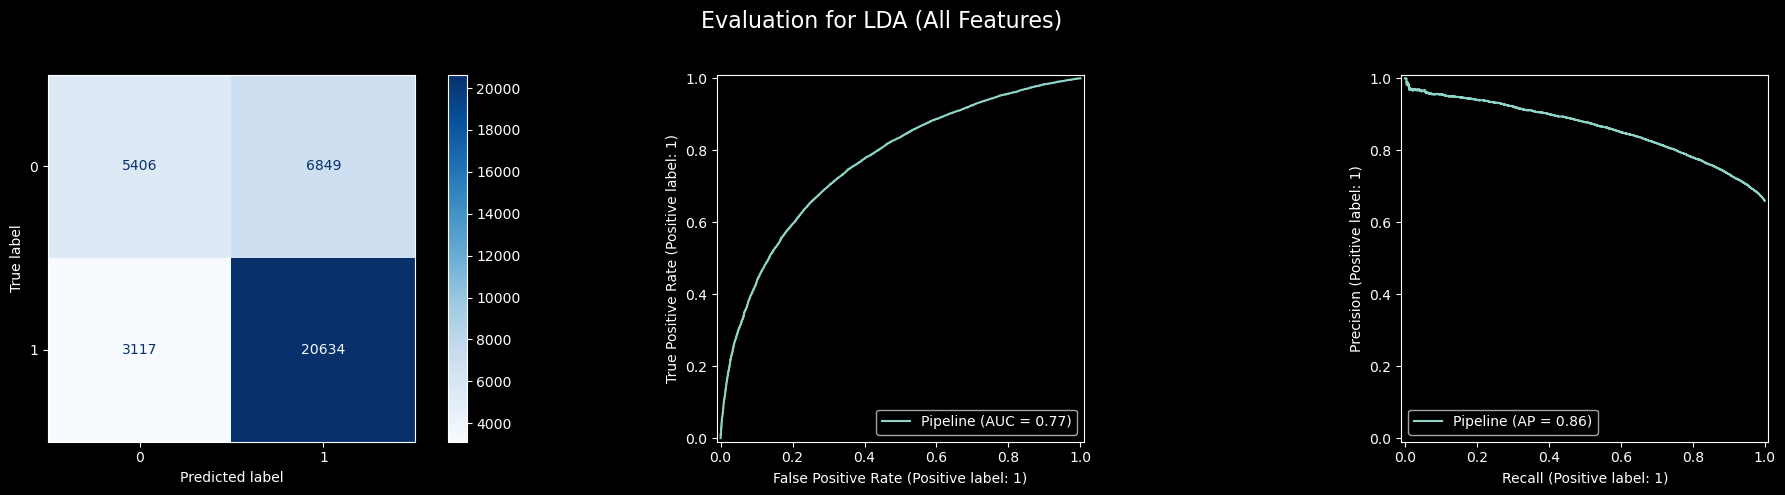


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.097699
39   cat__chccopd1     0.636788
13    cat__x_age_g    -0.433930
42   cat__chckdny1    -0.330622
18   cat__exerany2    -0.328614
38    cat__asthma3    -0.304255
41   cat__addepev2     0.259651
36   cat__cvdcrhd4    -0.243502
12    cat__genhlth    -0.194328
45   cat__pneuvac4    -0.180464
34   cat__checkup1    -0.156437
11  cat__x_bmi5cat     0.154242
26      cat__educa     0.145145
37   cat__cvdstrk3     0.136228
35   cat__cvdinfr4     0.131983
27    cat__marital    -0.130562
44   cat__diffwalk     0.118125
29  cat__x_metstat    -0.117220
25   cat__x_educag     0.116442
3       num__wtkg3     0.115971
33   cat__persdoc2    -0.096751
1      num__x_bmi5     0.092848
47  cat__x_ageg5yr     0.070020
14  cat__x_asthms1     0.068972
28   cat__x_incomg     0.063842
16  cat__x_casthm1    -0.061078
46   cat__x_rfhlth     0.058131
30  cat__x_urbstat    -0.055905
43   cat__diabete3    -0.050002
17  cat__x

In [21]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [22]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC    Time (s)
Model                                                                       
LightGBM (All Features)             0.711548  0.718320  0.785781    4.668169
CatBoost (All Features)             0.713964  0.720068  0.783659   97.964247
XGBoost (All Features)              0.707632  0.713678  0.773639    5.578803
LightGBM (VIF)                      0.697995  0.705314  0.770479    7.283849
CatBoost (VIF)                      0.699828  0.706576  0.768017  139.653067
LDA (All Features)                  0.723213  0.708436  0.767798    3.018193
Logistic Regression (All Features)  0.721074  0.702197  0.765514   21.922192
XGBoost (VIF)                       0.692551  0.699228  0.756607    4.672874
Decision Tree (All Features)        0.714464  0.702881  0.752044    3.985869
Decision Tree (VIF)                 0.705605  0.690352  0.743037    2.967708
LDA (VIF)                           0.703494  0.6813

### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [45]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 4

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.6804

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.17      0.27     12255
           1       0.69      0.94      0.80     23751

    accuracy                           0.68     36006
   macro avg       0.65      0.56      0.53     36006
weighted avg       0.66      0.68      0.62     36006



In [ ]:
# # 'forward': انتخاب متوالی رو به جلو (شروع با هیچ ویژگی و اضافه کردن یکی یکی)
# # 'backward': حذف متوالی رو به عقب (شروع با همه ویژگی‌ها و حذف یکی یکی)
# # n_features_to_select: تعداد ویژگی‌های نهایی (می‌تواند یک عدد یا درصد باشد، مثلاً 0.8 برای 80% ویژگی‌ها)
# # cv: تعداد foldهای اعتبارسنجی متقابل
# # n_jobs: برای موازی‌سازی (1- برای استفاده از تمام هسته‌های پردازنده)

# sfs_selector = SequentialFeatureSelector(
#     estimator=LogisticRegression(random_state=42, max_iter=2000, solver='liblinear'),
#     n_features_to_select=15,
#     direction='forward', # 'forward' (پیشنهادی برای شروع) یا 'backward'
#     cv=3,
#     n_jobs=-1
# )

# sfs_selector.fit(X_processed, y)

# selected_features_mask_sfs = sfs_selector.get_support()
# selected_features_names_sfs = feature_names_processed[selected_features_mask_sfs].tolist()

# print("ویژگی‌های انتخاب شده توسط SFS:")
# print(selected_features_names_sfs)
# print(f"تعداد ویژگی‌های انتخاب شده توسط SFS: {len(selected_features_names_sfs)}")


In [ ]:
# print("\n--- روش Embedded: لاسو (L1 Regularization) ---")

# # آموزش یک مدل Logistic Regression با پنالتی 'l1' (Lasso)
# # C: معکوس قدرت رگولاریزاسیون.
# # مقادیر کوچکتر C منجر به رگولاریزاسیون قوی‌تر و حذف ویژگی‌های بیشتر (صفر شدن ضریب‌ها) می‌شود.
# # solver='liblinear' برای L1 مناسب است.
# lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42, max_iter=2000)

# # استفاده از SelectFromModel برای انتخاب ویژگی‌هایی که ضرایب آن‌ها صفر نشده‌اند (یا بالاتر از یک آستانه هستند)
# # threshold='1e-5' به معنی انتخاب ویژگی‌هایی است که قدر مطلق ضریبشان بزرگتر از 0.00001 است.
# # این آستانه را می‌توانید تغییر دهید تا تعداد ویژگی‌های متفاوتی را انتخاب کنید.
# sfm_lasso = SelectFromModel(lasso_model, prefit=False, threshold='1e-5')

# sfm_lasso.fit(X_processed, y)

# selected_features_mask_lasso = sfm_lasso.get_support()
# selected_features_names_lasso = feature_names_processed[selected_features_mask_lasso].tolist()

# print("ویژگی‌های انتخاب شده توسط لاسو (L1 Regularization):")
# print(selected_features_names_lasso)
# print(f"تعداد ویژگی‌های انتخاب شده توسط لاسو: {len(selected_features_names_lasso)}")


In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# print(f"Shape of training data (X_train): {X_train.shape}, Shape of testing data (X_test): {X_test.shape}")
# print(f"Shape of training target (y_train): {y_train.shape}, Shape of testing target (y_test): {y_test.shape}")

# weights_train = weights.loc[X_train.index]

# feature_selector_step = ('selector', SelectKBest(score_func=f_classif, k=15))

# # Using Stratified K-Fold due to potential class imbalance
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- Train and Tune Different Models using GridSearchCV ---
# best_models = {}

# # List of classifiers and their parameter grids to test
# classifiers_to_test = [
#     # {
#     #     'name': 'Logistic Regression',
#     #     'estimator': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),       # Added max_iter for convergence
#     #     'param_grid': {'classifier__C': [0.01, 0.1, 1, 10, 100]}         # Tuning C
#     # },
#     # {
#     #     'name': 'K-Nearest Neighbors',
#     #     'estimator': KNeighborsClassifier(),
#     #     'param_grid': {'classifier__n_neighbors': [3, 5, 7, 9, 11, 13 , 15]}         # Tuning n_neighbors
#     # },
#     {
#         'name': 'Support Vector Classifier (SVC)',
#         'estimator': SVC(random_state=42, class_weight='balanced', probability=True), # probability=True needed for some advanced analysis later, class_weight='balanced'
#         # Let's tune C and gamma for the RBF kernel, which is common
#         'param_grid': {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__gamma': ['scale', 'auto']}       # Tuning C and gamma
#     },
#      {
#         'name': 'Random Forest Classifier',
#         'estimator': RandomForestClassifier(random_state=42, class_weight='balanced'),      # class_weight='balanced' is supported
#         # Let's tune n_estimators and max_depth
#         'param_grid': {'classifier__n_estimators': [50, 100, 200],          # Number of trees
#                        'classifier__max_depth': [None, 10, 20]}             # Max depth (None means full depth)
#     },
#      {
#         'name': 'Decision Tree Classifier',
#         'estimator': DecisionTreeClassifier(random_state=42, class_weight='balanced'),      # class_weight supported
#         'param_grid': {'classifier__max_depth': [None, 5, 10, 15, 20],      # Max depth
#                        'classifier__criterion': ['gini', 'entropy']}        # Split criterion
#     },
#      {
#         'name': 'Gradient Boosting Classifier',
#         'estimator': GradientBoostingClassifier(random_state=42),       # No class_weight parameter
#         'param_grid': {'classifier__n_estimators': [50, 100, 200],
#                        'classifier__learning_rate': [0.01, 0.1, 0.2],
#                        'classifier__max_depth': [3, 5, 7]}      # Max depth for individual trees
#     },
#      {
#         'name': 'Gaussian Naive Bayes',
#         'estimator': GaussianNB(), # No class_weight parameter
#         'param_grid': {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}     # Laplace smoothing
#     },
#      {
#         'name': 'MLP Classifier (Neural Network)',
#         'estimator': MLPClassifier(random_state=42, max_iter=500, early_stopping=True),     # Add early_stopping to prevent overfitting and set max_iter
#         # class_weight='balanced' can be added to MLPClassifier
#         'param_grid': {'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],         # Number of neurons/layers
#                        'classifier__alpha': [0.0001, 0.001, 0.01],      # L2 regularization
#                        'classifier__activation': ['relu', 'tanh']}      # Activation function
#     }
# ]

# scoring_metric = 'f1' 

# print(f"Starting GridSearchCV for different models using {cv.get_n_splits()} folds and scoring '{scoring_metric}'.")

# for model_info in classifiers_to_test:
#     model_name = model_info['name']
#     estimator = model_info['estimator']
#     param_grid = model_info['param_grid']

#     print(f"Testing model: {model_name}")
#     # Create the pipeline for the current model
#     model_pipeline = Pipeline([
#         ('preprocessor', preprocessor),      # Step 1: Preprocessing (Imputation, Scaling, One-Hot Encoding)
#         feature_selector_step,               # Step 2: Feature Selection (SelectKBest)
#         ('classifier', estimator)            # Step 3: The Classifier
#     ])

#     # Setup GridSearchCV
#     grid_search = GridSearchCV(estimator=model_pipeline,
#                                param_grid=param_grid,
#                                cv=cv,
#                                scoring=scoring_metric,
#                                n_jobs=-1) # Use all available CPU cores

#     # Fit GridSearchCV on the training data
#     # This will run cross-validation for each combination of parameters
#     grid_search.fit(X_train, y_train, sample_weight=weights_train)

#     print(f"\nResults for {model_name}:")
#     print(f"  Best parameters: {grid_search.best_params_}")
#     print(f"  Best cross-validation {scoring_metric} score: {grid_search.best_score_:.4f}")

#     # Store the best model (the pipeline with best parameters refitted on the whole training data)
#     best_models[model_name] = {
#         'best_estimator': grid_search.best_estimator_,
#         'best_cv_score': grid_search.best_score_,
#         'best_params': grid_search.best_params_
#     }
#     print("-" * 60)
